In [1]:
import pathlib
import pandas as pd
import numpy as np

import json

In [2]:
input_path = pathlib.Path('./SBJ_2102_001')

In [25]:
전유부 = pd.read_csv(input_path.joinpath('1.세종시_전유부.csv'),encoding="utf-8")
표제부 = pd.read_csv(input_path.joinpath('2.세종시_표제부.csv'),encoding="utf-8")
아파트매매 = pd.read_csv(input_path.joinpath('3.세종시_아파트(매매)_실거래가.csv'),encoding="utf-8")
연립매매 = pd.read_csv(input_path.joinpath('4.세종시_연립다세대(매매)_실거래가.csv'),encoding="utf-8")
다가구매매 = pd.read_csv(input_path.joinpath('5.세종시_단독다가구(매매)_실거래가.csv'),encoding="utf-8")
오피스텔매매 = pd.read_csv(input_path.joinpath('6.세종시_오피스텔(매매)_실거래가.csv'),encoding="utf-8")
아파트전월세 = pd.read_csv(input_path.joinpath('7.세종시_아파트(전월세)_실거래가.csv'),encoding="utf-8")
연립전월세 = pd.read_csv(input_path.joinpath('8.세종시_연립다세대(전월세)_실거래가.csv'),encoding="utf-8")
다가구전월세 = pd.read_csv(input_path.joinpath('9.세종시_단독다가구(전월세)_실거래가.csv'),encoding="utf-8")
오피스텔전월세 = pd.read_csv(input_path.joinpath('10.세종시_오피스텔(전월세)_실거래가.csv'),encoding="utf-8")
상업매매 = pd.read_csv(input_path.joinpath('11.세종시_상업업무용(매매)_실거래가.csv'),encoding="utf-8")
토지매매 = pd.read_csv(input_path.joinpath('12.세종시_토지(매매)_실거래가.csv'),encoding="utf-8")
분양권 = pd.read_csv(input_path.joinpath('13.세종시_분양권_실거래가.csv'),encoding="utf-8")
상권정보 = pd.read_csv(input_path.joinpath('14.세종시_상권정보.csv'),encoding="utf-8")
상권정보업종 = pd.read_csv(input_path.joinpath('15.세종시_상권정보_업종코드.csv'),encoding="utf-8")

전입자수 = pd.read_csv(input_path.joinpath('20.세종시_전입자수.csv'),encoding="utf-8")
전출자수 = pd.read_csv(input_path.joinpath('21.세종시_전출자수.csv'),encoding="utf-8")
연령별인구 = pd.read_csv(input_path.joinpath('22.세종시_연령별_인구현황.csv'),encoding="utf-8")
월평균소비지출액 = pd.read_csv(input_path.joinpath('25.세종시_가구_월평균_소비지출액.csv'),encoding="utf-8")
거주기간 = pd.read_csv(input_path.joinpath('26.세종시_거주기간.csv'),encoding="utf-8")
월평균소득 = pd.read_csv(input_path.joinpath('27.세종시_월평균_가구소득.csv'),encoding="utf-8")
지역별세대수 = pd.read_csv(input_path.joinpath('28.세종시_지역별_세대원수별_세대수.csv'),encoding="utf-8")
거주의사 = pd.read_csv(input_path.joinpath('29.세종시_거주의사(향후).csv'),encoding="utf-8")

D:\Program\Anaconda3\envs\hyeri\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Program\Anaconda3\envs\hyeri\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#분류
거주기간_읍면동=거주기간.loc[1:3]
거주기간_성별=거주기간.loc[4:5]
거주기간_연령별=거주기간.loc[6:12]
거주기간_교육정도별=거주기간.loc[13:16]
거주기간_직업별=거주기간.loc[17:22]
거주기간_혼인상태별=거주기간.loc[23:25]
거주기간_가구소득별=거주기간.loc[26:33]
거주기간_맞벌이유무=거주기간.loc[34:35]
거주기간_주거형태별=거주기간.loc[36:]

In [5]:
거주의사_읍면동=거주의사.loc[1:3]
거주의사_성별=거주의사.loc[4:5]
거주의사_연령별=거주의사.loc[6:14]
거주의사_교육정도별=거주의사.loc[15:18]
거주의사_직업별=거주의사.loc[19:24]
거주의사_혼인상태별=거주의사.loc[25:27]
거주의사_가구소득별=거주의사.loc[28:35]
거주의사_맞벌이유무=거주의사.loc[36:37]
거주의사_주거형태별=거주의사.loc[38:]

In [20]:
월평균소득_읍면동=월평균소득.loc[1:3]
월평균소득_성별=월평균소득.loc[4:5]
월평균소득_거주기간별=월평균소득.loc[6:7]
월평균소득_연령별=월평균소득.loc[8:14]
월평균소득_교육정도별=월평균소득.loc[15:18]
월평균소득_직업별=월평균소득.loc[19:24]
월평균소득_혼인상태별=월평균소득.loc[25:27]
월평균소득_맞벌이유무=월평균소득.loc[28:29]
월평균소득_주거형태별=월평균소득.loc[30:]


In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
지역_합=지역별세대수.loc[:,['읍면동','계']]
지역_합=지역_합.reset_index().set_index('읍면동')

In [27]:
지역별세대수

,읍면동,계,1인,2인,3인,4인,5인,6인,7인,8인,9인,10인이상
0,조치원읍,19472,8295,4165,3042,2729,944,220,63,9,4,1
1,연 기 면,1445,855,299,133,101,36,11,7,1,2,0
2,연 동 면,1680,834,461,206,114,44,14,5,1,0,1
3,부 강 면,3249,1603,821,420,273,93,34,3,0,0,2
4,금 남 면,4509,2128,1283,589,328,122,41,12,6,0,0
5,장 군 면,3453,1956,806,332,200,106,35,11,6,1,0
6,연 서 면,3834,1863,1022,484,276,129,38,16,3,2,1
7,전 의 면,3045,1551,753,352,244,107,29,8,0,1,0
8,전 동 면,2130,1224,491,213,124,57,15,6,0,0,0
9,소 정 면,1231,565,308,160,127,58,9,1,2,1,0


In [29]:
지역1인10인=지역별세대수.loc[:,['읍면동','1인','2인','3인','4인','5인','6인','7인','8인','9인','10인이상']]


['NanumGothic']


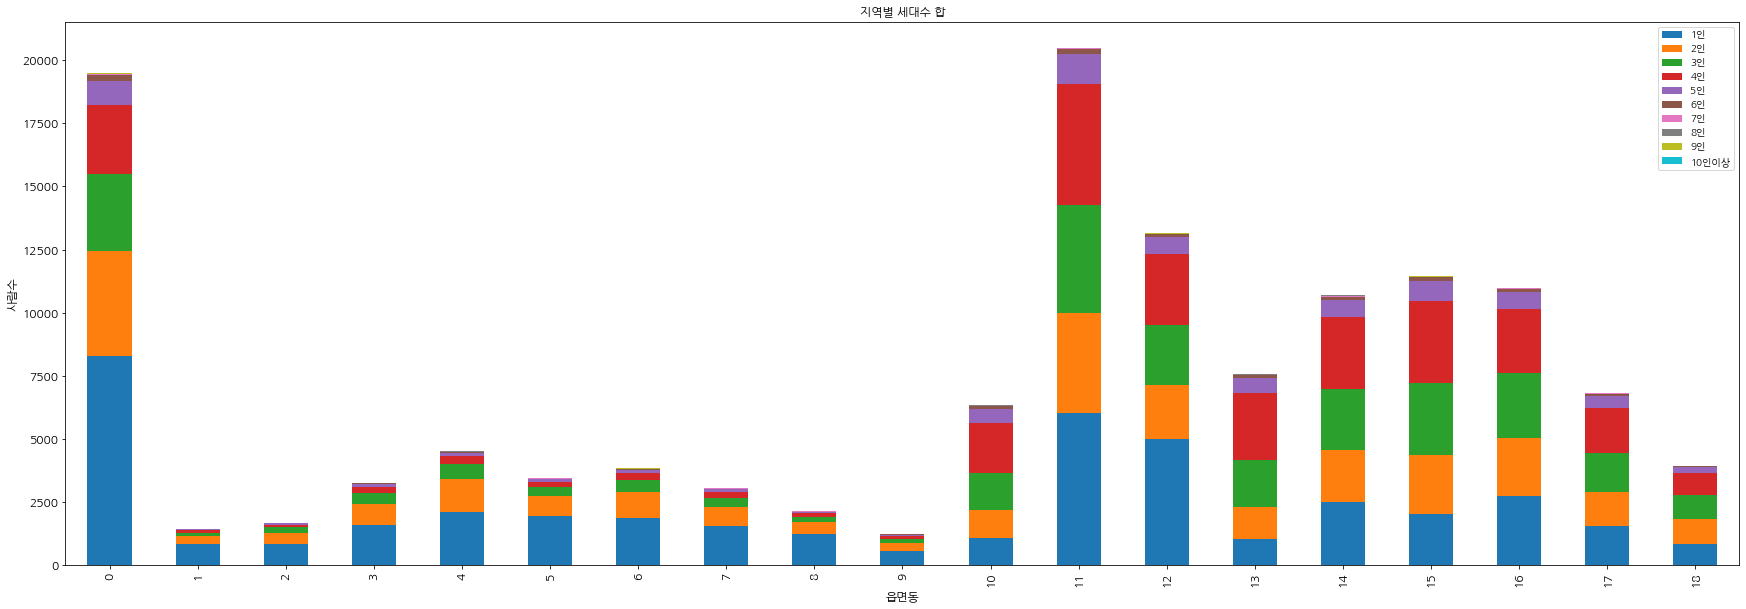

In [31]:
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline

ax=지역1인10인.plot(kind='bar',title='지역별 세대수 합',figsize=(30,10),legend=True,fontsize=12,stacked=True)
ax.set_xlabel('읍면동',fontsize=12)
ax.set_ylabel('사람수',fontsize=12)
ax.legend(['1인','2인','3인','4인','5인','6인','7인','8인','9인','10인이상'])

In [13]:
지역별계=지역별세대수.loc[:,['읍면동','계']]


In [15]:
지역별계=지역별계.reset_index().set_index('읍면동')

['NanumGothic']


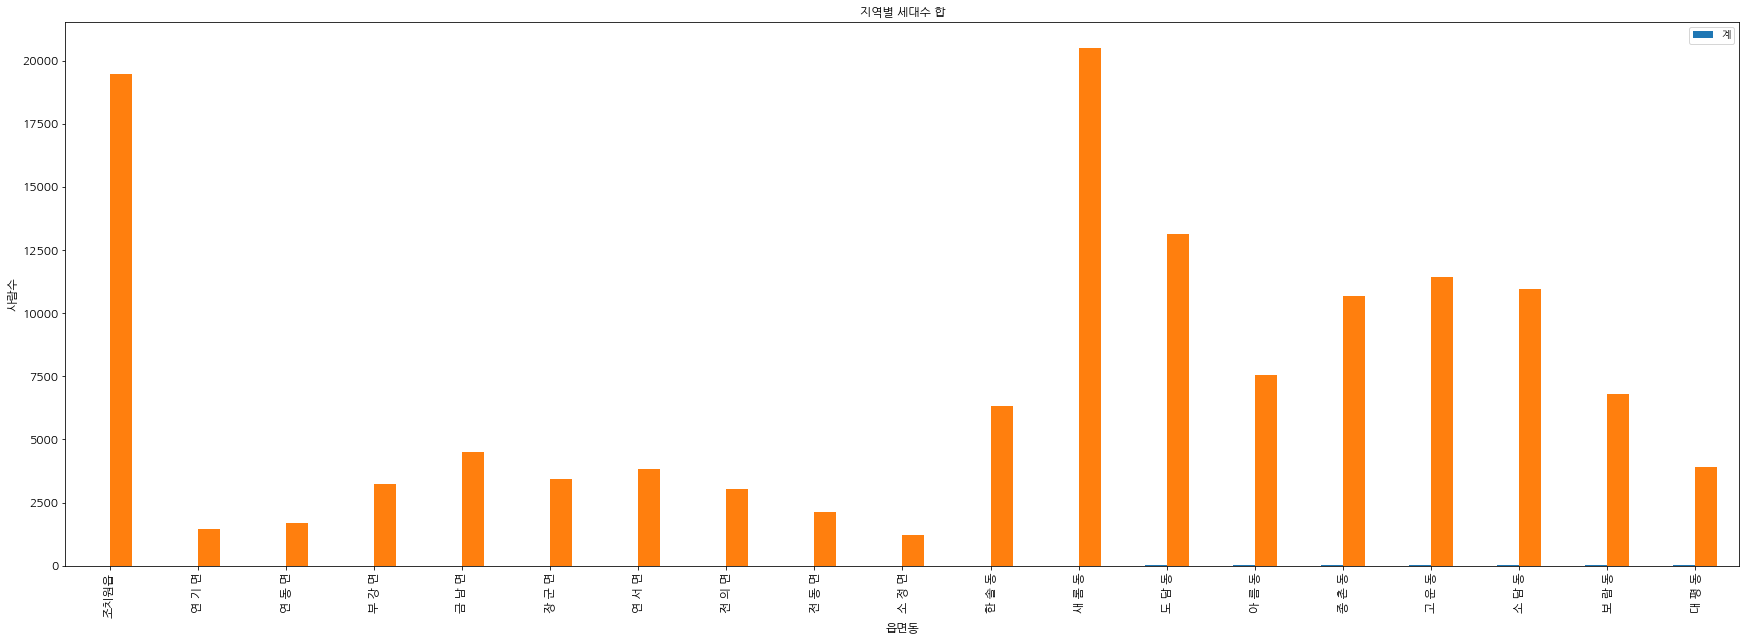

In [16]:
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline

ax=지역별계.plot(kind='bar',title='지역별 세대수 합',figsize=(30,10),legend=True,fontsize=12)
ax.set_xlabel('읍면동',fontsize=12)
ax.set_ylabel('사람수',fontsize=12)
ax.legend(['계'])

In [49]:
통합세대수=지역별세대수.sum(axis=1)

In [51]:
통합세대수

0     38944
1      2890
2      3360
3      6498
4      9018
5      6906
6      7668
7      6090
8      4260
9      2462
10    12666
11    40990
12    26272
13    15120
14    21382
15    22872
16    21946
17    13620
18     7852
dtype: int64

['NanumGothic']


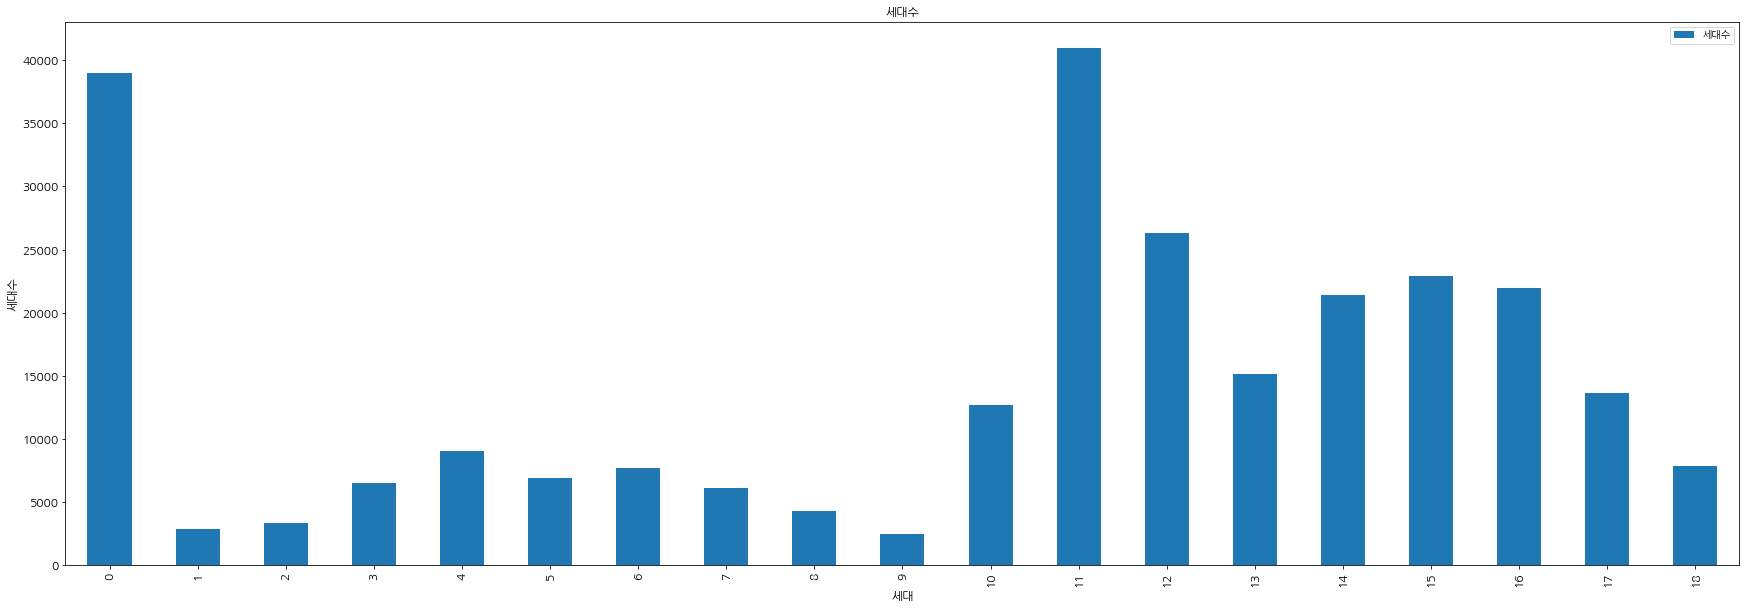

In [58]:
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline

ax=통합세대수.plot(kind='bar',title='세대수',figsize=(30,10),legend=True,fontsize=12)
ax.set_xlabel('세대',fontsize=12)
ax.set_ylabel('세대수',fontsize=12)
ax.legend(['세대수'])